In [1]:
%store -r final_df

In [2]:
df = final_df

In [3]:
df.head()

,Country,Status,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,2014,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,2013,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Univariate

### Countries

In [49]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",  # Match country names in your dataset
    color="Life expectancy ",
    color_continuous_scale="YlGnBu",
    title="Interactive Choropleth Map of Life Expectancy by Country"
)

# Update layout for full width, centered title, and tight layout
fig.update_layout(
    autosize=True,  # Ensures full-width rendering [[3]]
    title_x=0.5,    # Centers the title horizontally [[4]]
    margin=dict(l=20, r=20, t=40, b=20)  # Reduces whitespace for a tight layout [[9]]
)

fig.write_html("interactive_map.html")
fig.show(renderer='browser')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Sort the dataset by Life Expectancy
df_sorted = df.sort_values(by="Life expectancy ", ascending=False)

# Extract top 5 and bottom 5 countries
top_5 = df_sorted.head(5)
bottom_5 = df_sorted.tail(5)

In [53]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",  # Match country names in your dataset
    color="Life expectancy ",
    color_continuous_scale="YlGnBu",
    title="Interactive Choropleth Map of Life Expectancy by Country"
)

# Update layout for full width, centered title, and tight layout
fig.update_layout(
    autosize=True,  # Ensures full-width rendering [[3]]
    title_x=0.5,    # Centers the title horizontally [[4]]
    margin=dict(l=20, r=20, t=40, b=20)  # Reduces whitespace for a tight layout [[9]]
)

# Add annotations for top 5 countries
for _, row in top_5.iterrows():
    fig.add_annotation(
        lat=row["Latitude"],  # Replace with actual latitude column or lookup
        lon=row["Longitude"],  # Replace with actual longitude column or lookup
        text=f"{row['Country']}: {row['Life expectancy']:.1f}",
        showarrow=True,
        arrowhead=2,
        ax=0, ay=-40,  # Adjust arrow position
        font=dict(color="green", size=10)  # Highlight top countries in green
    )

# Add annotations for bottom 5 countries
for _, row in bottom_5.iterrows():
    fig.add_annotation(
        lat=row["Latitude"],  # Replace with actual latitude column or lookup
        lon=row["Longitude"],  # Replace with actual longitude column or lookup
        text=f"{row['Country']}: {row['Life expectancy']:.1f}",
        showarrow=True,
        arrowhead=2,
        ax=0, ay=40,  # Adjust arrow position
        font=dict(color="red", size=10)  # Highlight bottom countries in red
    )

# Save and display the map
fig.write_html("interactive_map.html")
fig.show(renderer='browser')

KeyError: 'Latitude'

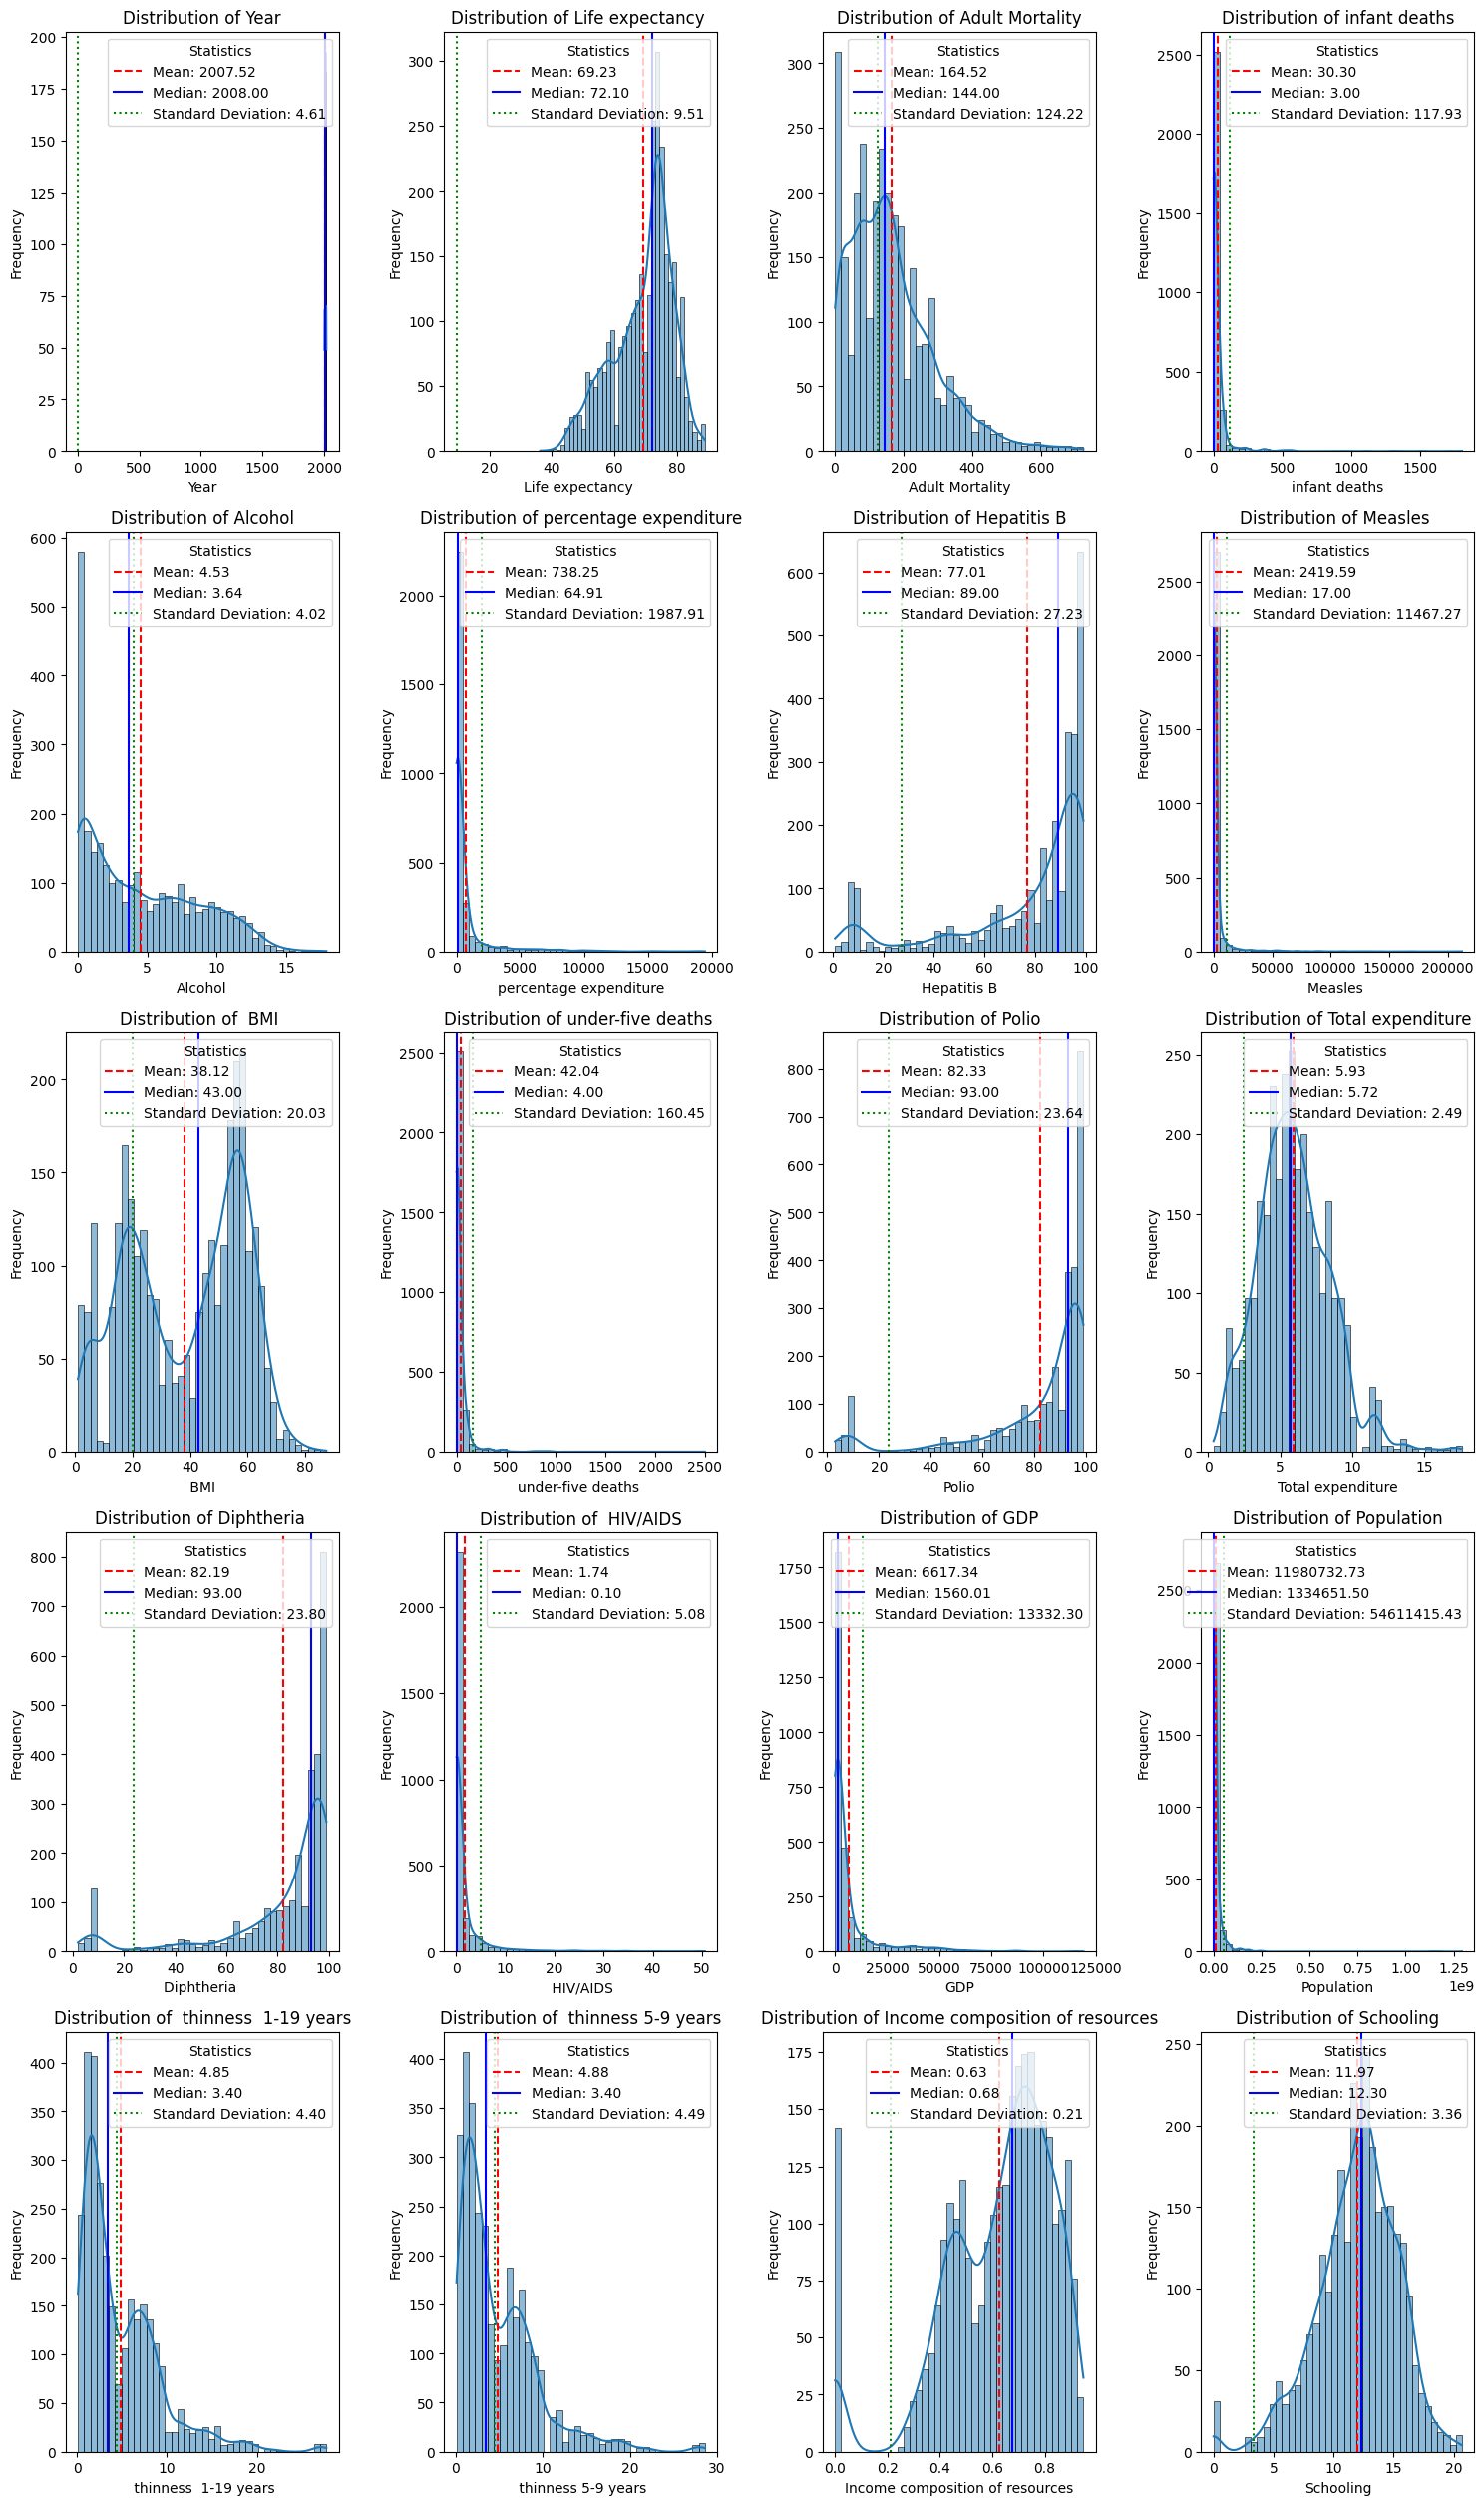

In [7]:


#I will make histplots for every numerical variable in my dataset
num_col = [col for col in df.select_dtypes(include=['number']).columns if col!='year']

#Number of rows and cols for subplots
num_vars = len(num_col)
rows = (num_vars+2//3) + (num_vars//3>0)
cols = min(num_vars,4)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

#loop in cols in order to make the histplots
for i,col in enumerate(num_col):
    sns.histplot(df[col].dropna(),bins=40,ax = axes[i],kde=True)
    mean=df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='blue', linestyle='-',label=f'Median: {median:.2f}')
    axes[i].axvline(std_dev,color='green',linestyle=':',label=f'Standard Deviation: {std_dev:.2f}')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Statistics', loc='upper right')

# Hide the unused sublplots
for j in range(num_vars,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
df.columns.nunique()

22